# Step 1 :-  Import necessary  libraries

In [337]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings('ignore')

# Step 2:- Read DataSet

In [338]:
df=pd.read_csv("D:\\datasets\\Healthcare\\healthcare_dataset.csv") # read the Data 
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


# Step 3:- Sainty Check of Data  

In [339]:
#To learn the form of  the data 
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [340]:
# To check the dimention of data frame
df.shape    

(10000, 15)

In [341]:
#finding missing values
df.isnull().sum() 

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [342]:
#finding duplicates 
df.duplicated().sum()

0

In [343]:
#Columns name :
n_columns=list(df.columns)
n_columns

['Name',
 'Age',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Billing Amount',
 'Room Number',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results']

In [344]:
for check_values in categrical_col :
    print(f'column name :{check_values}')
    print("-------------------------------")
    print(df[check_values].values)
    

column name :Gender
-------------------------------
['Female' 'Male' 'Male' ... 'Male' 'Male' 'Male']
column name :Blood Type
-------------------------------
['O-' 'O+' 'B-' ... 'B-' 'A+' 'B-']
column name :Medical Condition
-------------------------------
['Diabetes' 'Asthma' 'Obesity' ... 'Arthritis' 'Arthritis' 'Arthritis']
column name :Doctor
-------------------------------
['Patrick Parker' 'Diane Jackson' 'Paul Baker' ... 'Robert Nicholson'
 'Jamie Lewis' 'Tasha Avila']
column name :Hospital
-------------------------------
['Wallace-Hamilton' 'Burke, Griffin and Cooper' 'Walton LLC' ...
 'Larson and Sons' 'Wilson-Lyons' 'Torres, Young and Stewart']
column name :Insurance Provider
-------------------------------
['Medicare' 'UnitedHealthcare' 'Medicare' ... 'Blue Cross'
 'UnitedHealthcare' 'Aetna']
column name :Admission Type
-------------------------------
['Elective' 'Emergency' 'Emergency' ... 'Elective' 'Urgent' 'Emergency']
column name :Medication
----------------------------

In [345]:
for col in df :
    print(f"{col} :" ,df[col].nunique() )

Name : 9378
Age : 68
Gender : 2
Blood Type : 8
Medical Condition : 6
Date of Admission : 1815
Doctor : 9416
Hospital : 8639
Insurance Provider : 5
Billing Amount : 10000
Room Number : 400
Admission Type : 3
Discharge Date : 1834
Medication : 5
Test Results : 3


In [346]:
categrical_col=['Gender','Blood Type','Medical Condition','Doctor','Hospital','Insurance Provider','Admission Type','Medication']

In [347]:
df["Name"].nunique()

9378

In [348]:
df.set_index("Name",inplace=True)

# Step 4:- Exploratory Data Analysis (EDA) 

In [349]:
# descriptive statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,51.452200,19.588974,18.000000,35.000000,52.000000,68.000000,85.000000
Billing Amount,10000.0,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283
Room Number,10000.0,300.082000,115.806027,101.000000,199.000000,299.000000,400.000000,500.000000


In [350]:
#discribtion of categrical columns 
df.describe(include="object")

,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


**Visulization of Continouis Data** 


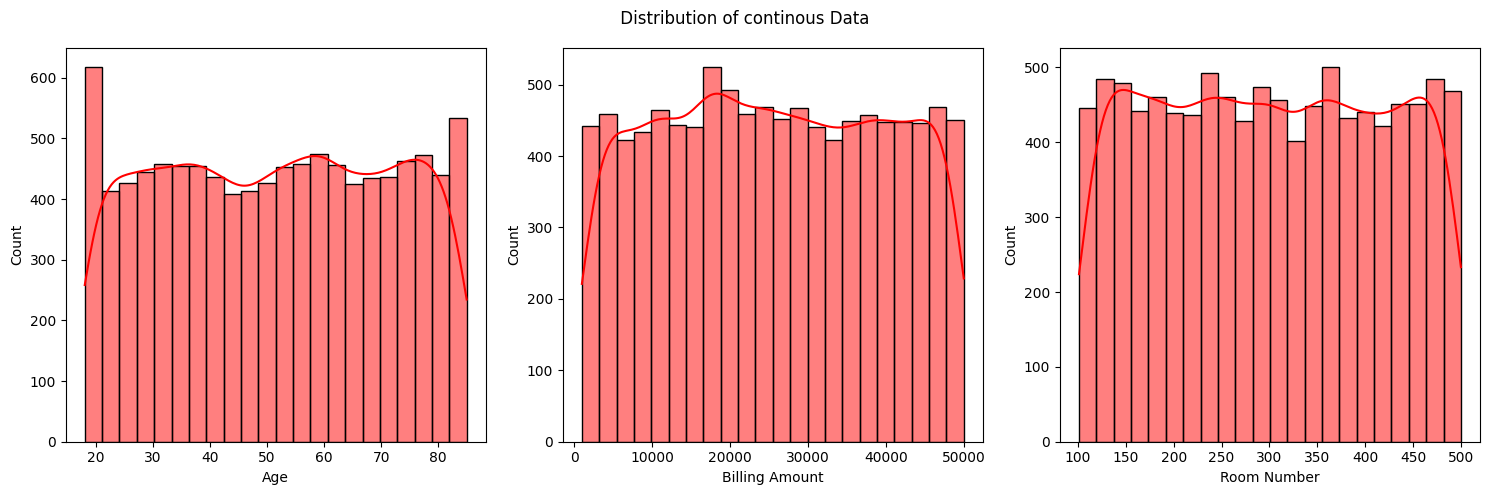

In [351]:
#histogram to understand the distribution
c=list(df.select_dtypes(include="number"))
fig,ax=plt.subplots(1,3,figsize=(15, 5))
for i,col in enumerate(c):
    sns.histplot(data=df,x=col,kde=True,color='r', edgecolor='black',ax=ax[i])
fig.suptitle(" Distribution of continous Data ")
plt.tight_layout()
plt.show()

In [352]:
df.select_dtypes(include="number").columns

Index(['Age', 'Billing Amount', 'Room Number'], dtype='object')

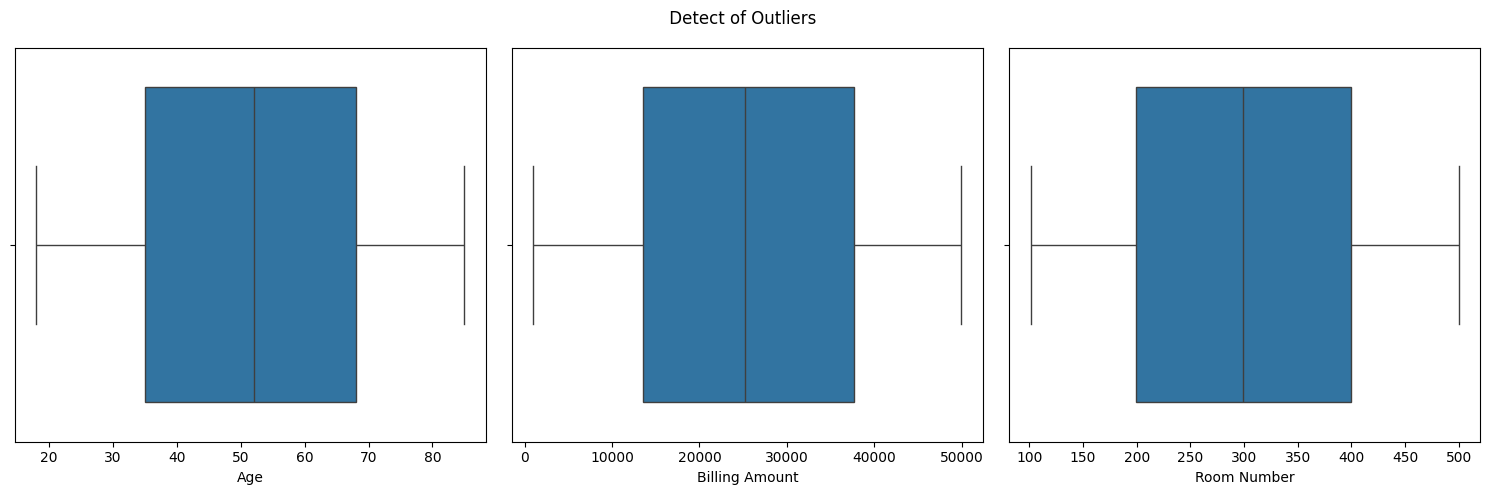

In [353]:
#Boxplot-to-identify Outliers 
c=list(df.select_dtypes(include="number"))
fig,ax=plt.subplots(1,3,figsize=(15, 5))
for i,col in enumerate(c):
    sns.boxplot(data=df,x=col,ax=ax[i])
fig.suptitle(" Detect of Outliers  ")
plt.tight_layout()
plt.show()

We conclude from the box graphs that there are no ouliers and that the data is uniformly distributed

**Check if the Data Balancet or not**

<Axes: xlabel='Test Results', ylabel='count'>

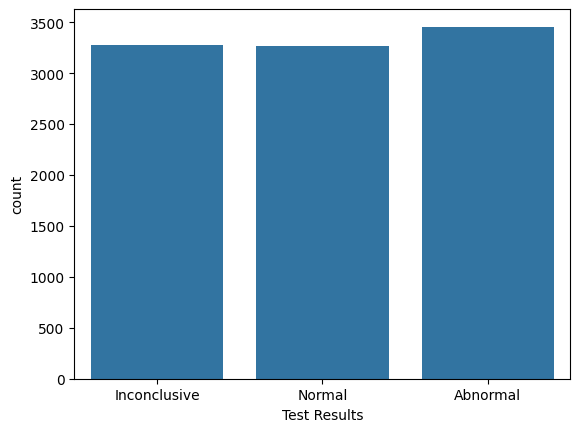

In [354]:
sns.countplot(data=df,x="Test Results")

In [355]:
df['Medical Condition'].values

array(['Diabetes', 'Asthma', 'Obesity', ..., 'Arthritis', 'Arthritis',
       'Arthritis'], dtype=object)

In [356]:
x=np.arange(6)
x

array([0, 1, 2, 3, 4, 5])

**Test whether there is a species**
**A certain blood type had more influence on whether a person carried a certain disease**

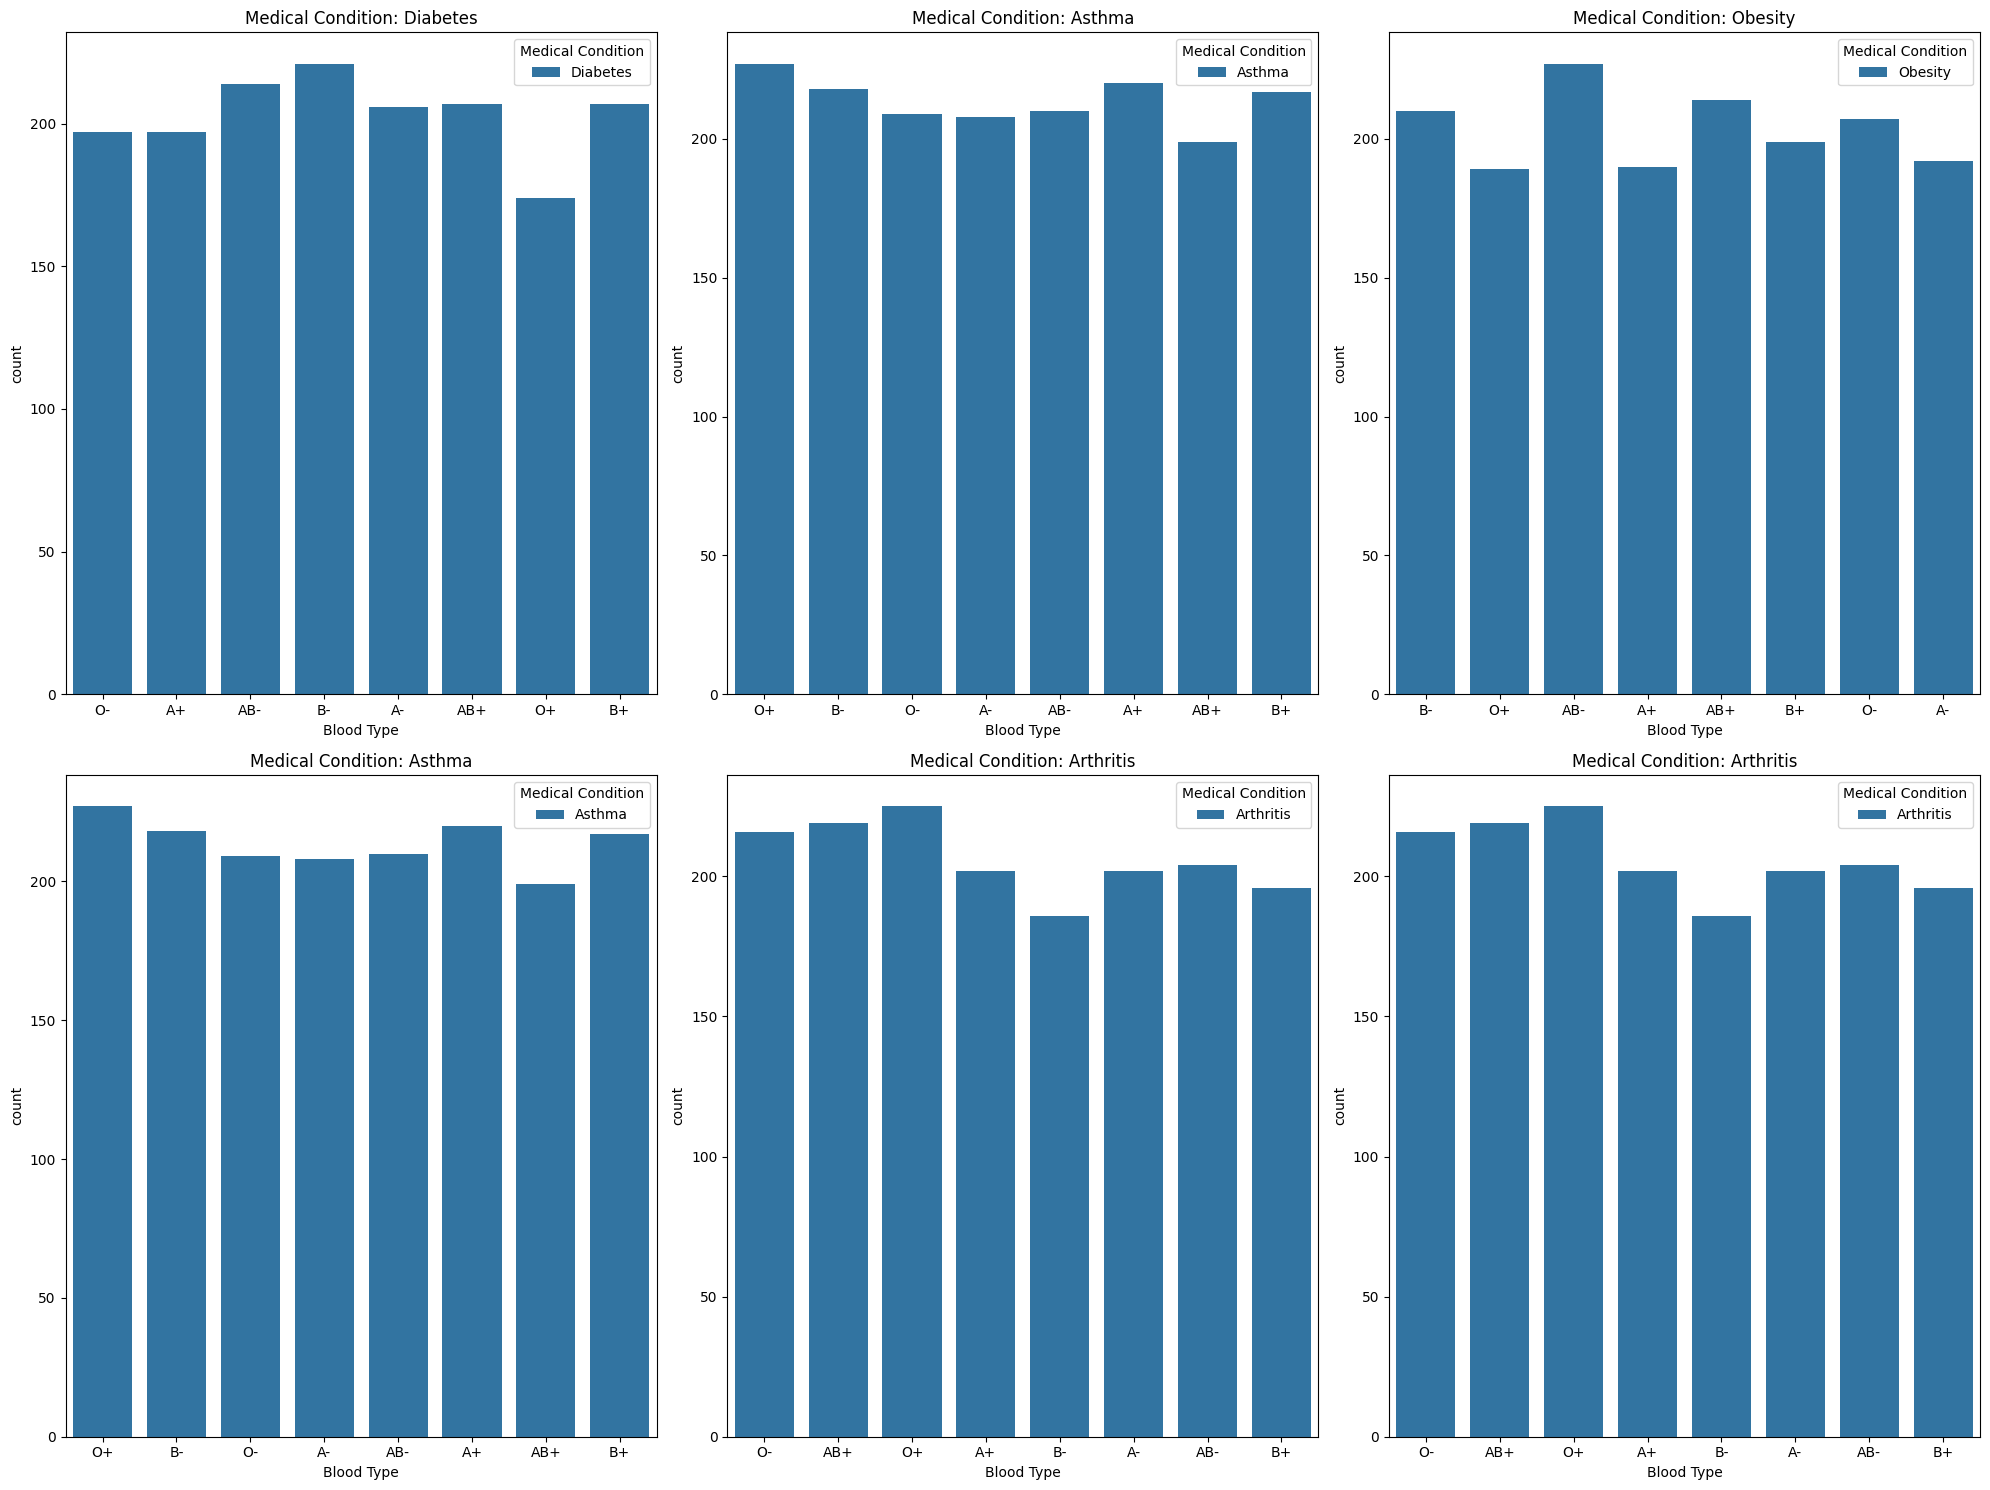

In [357]:
x = np.arange(6)

# Create a figure with subplots
figure, axes = plt.subplots(2, 3, figsize=(20, 15))  # 2 rows, 3 columns of subplots


for condition, index in zip(df['Medical Condition'].values, x):
    # Filter DataFrame based on the current medical condition
    df_m = df[df['Medical Condition'] == condition]
    
    # Plot the count of 'Blood Type' for the current medical condition on a specific subplot
    sns.countplot(data=df_m, x='Blood Type' ,hue='Medical Condition', ax=axes[index // 3, index % 3])
    
    # Set subplot title
    axes[index // 3, index % 3].set_title(f'Medical Condition: {condition}')
    
# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

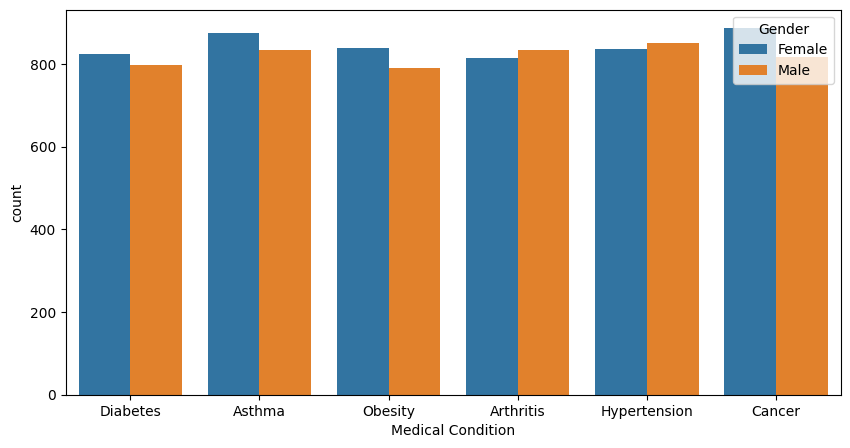

In [358]:
fig, ax = plt.subplots()
sns.countplot(data=df,x="Medical Condition",hue="Gender",ax=ax)
fig.set_size_inches((10, 5))

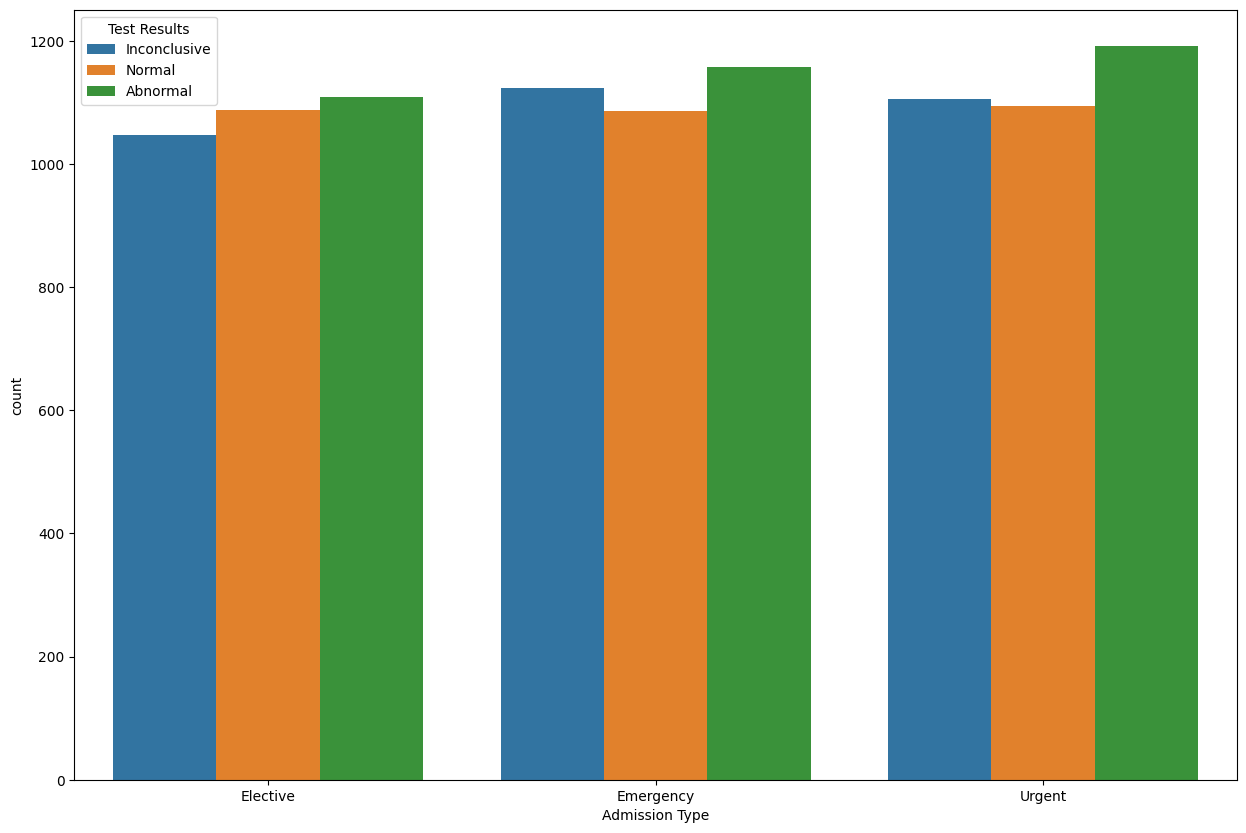

In [359]:
fig, ax = plt.subplots()
sns.countplot(data=df ,x="Admission Type",hue="Test Results",ax=ax)
fig.set_size_inches((15, 10))

In [360]:
blood_type_distribution = df['Blood Type'].value_counts()
blood_type_distribution

Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

**check relationship between Billing Amount and Age**

<Axes: xlabel='Age', ylabel='Billing Amount'>

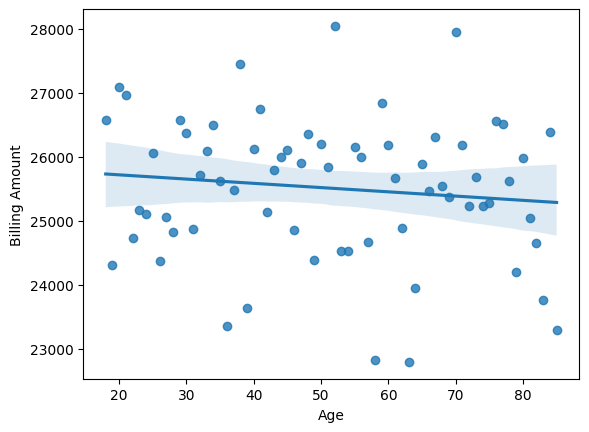

In [361]:
#regplot to understand the relationship :
sns.regplot(data=df_ab,x=df_ab["Age"],y=df_ab["Billing Amount"])

In [362]:
df_ab=df.groupby("Age")["Billing Amount"].mean()
df_ab=df_ab.to_frame()
df_ab.reset_index(inplace=True)
df_ab

,Age,Billing Amount
0,18,26579.229435
1,19,24308.656799
2,20,27092.522760
3,21,26974.847365
4,22,24724.059899
...,...,...
63,81,25038.110131
64,82,24646.693825
65,83,23763.756833
66,84,26382.833446


Text(0.5, 1.0, 'Distribution of Age & Billing Amount ')

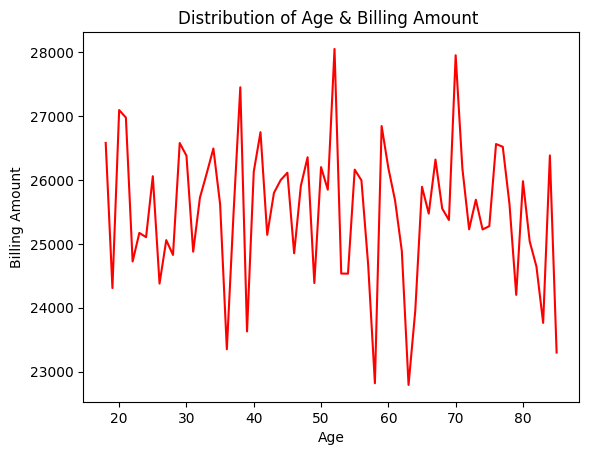

In [363]:
plt.plot(df_ab["Age"],df_ab["Billing Amount"],color='r')
plt.xlabel("Age")
plt.ylabel("Billing Amount")
plt.title("Distribution of Age & Billing Amount ")

There is no linear relationship between the increase in bill price and the patient's age

<Axes: >

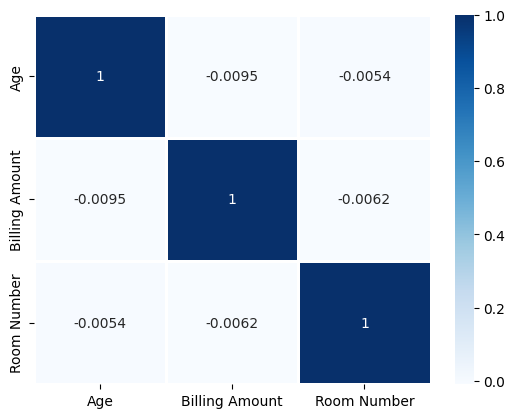

In [364]:
#correlation with heatmap
corr_df=df.select_dtypes(include='number').corr()
sns.heatmap(corr_df,annot=True,cmap="Blues",linewidths=1)

**Visulization of Categorical Data** 

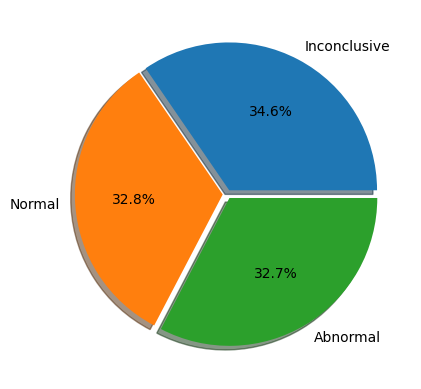

In [365]:
#Check if Dataset is balencet or not 
plt.pie(df["Test Results"].value_counts(),labels=df["Test Results"].unique(),shadow=True ,explode=[0.03,0.03,0.03],autopct='%1.1F%%')
plt.show()




SO the Data is balenced

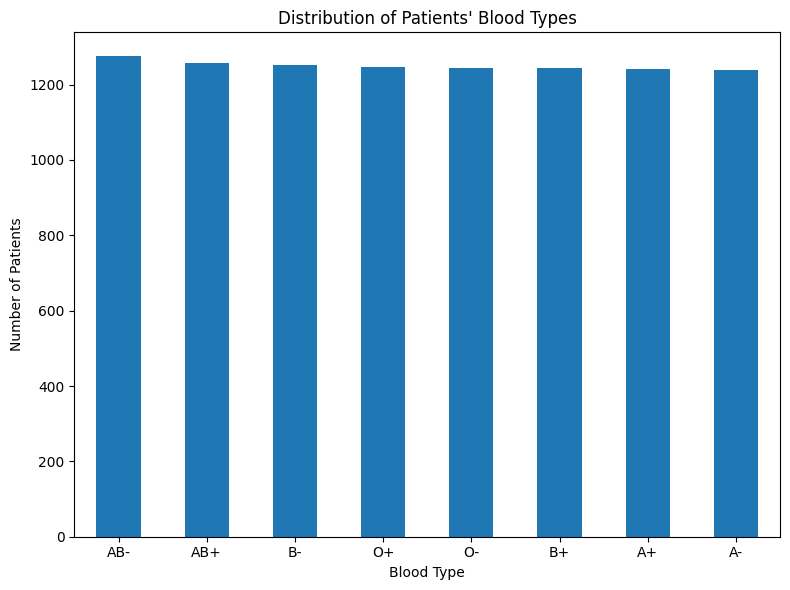

In [366]:

plt.figure(figsize=(8, 6))
blood_type_distribution.plot(kind='bar')
plt.xlabel('Blood Type')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients\' Blood Types')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [367]:
df.sample(10)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
Name,,,,,,,,,,,,,,
Benjamin Howard,76,Female,A+,Arthritis,2022-08-15,James Moore,Davidson-Chavez,Medicare,19909.398011,154,Urgent,2022-08-22,Lipitor,Inconclusive
Kerry Pittman,53,Male,O+,Cancer,2021-05-26,Jessica Foster,"Kramer, Carroll and Rodriguez",Cigna,10199.247756,196,Elective,2021-06-11,Penicillin,Normal
Kyle Jacobson MD,28,Female,O+,Arthritis,2022-05-17,Nicholas Marsh,"Sanchez, Smith and Brooks",Aetna,34511.355378,176,Elective,2022-05-20,Paracetamol,Normal
Charles Patel,82,Female,B-,Cancer,2022-10-30,Tyler Forbes,"Wolf, Ellison and May",Blue Cross,12958.944116,359,Elective,2022-11-10,Penicillin,Abnormal
Michael Crawford,38,Male,AB-,Arthritis,2021-04-23,Sarah Mcneil,Williams-Arias,Blue Cross,25159.923895,233,Elective,2021-05-22,Aspirin,Abnormal
Lindsay Williamson,31,Female,B+,Hypertension,2021-04-12,Megan Mitchell,Miller-Murray,UnitedHealthcare,32540.751352,491,Emergency,2021-05-11,Lipitor,Abnormal
Brooke Ellison,41,Male,A+,Asthma,2021-03-29,Christina Barnes,"Gray, Scott and Hernandez",Medicare,42208.798749,162,Elective,2021-04-25,Ibuprofen,Inconclusive
Jennifer Turner,45,Female,AB-,Diabetes,2021-03-24,Matthew Bush,Maldonado and Sons,Blue Cross,42865.484196,368,Emergency,2021-04-02,Penicillin,Normal
John Clark,51,Male,A-,Diabetes,2021-07-23,Julian Miller,Golden-Mercado,Blue Cross,33142.016643,313,Elective,2021-08-09,Lipitor,Inconclusive


<Axes: xlabel='Gender', ylabel='count'>

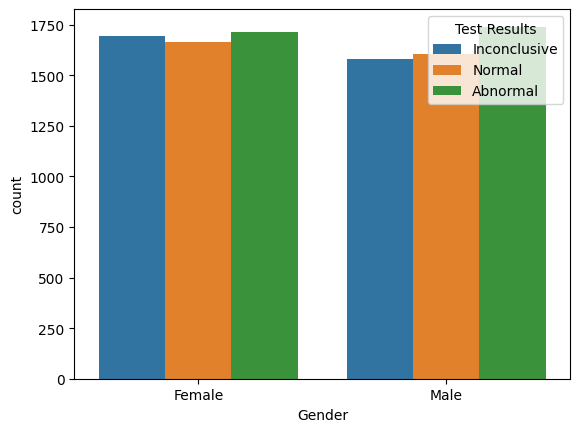

In [368]:
sns.countplot(data=df,x="Gender",hue="Test Results")

# Step 5 :- Preprocessing Data -Before Building Machine learning Model :

In [369]:

# convert the date column into a datetime object
df["Date of Admission"]=pd.to_datetime(df["Date of Admission"])
df["Discharge Date"]=pd.to_datetime(df["Discharge Date"])


In [370]:

df["Hospital Stay"]=df["Discharge Date"]-df["Date of Admission"]

In [371]:
df["Hospital Stay"]=df["Hospital Stay"].dt.days

**Relation between number of period os staying at hospital and result of test**

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, Tiffany Ramirez to Eric King
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 10000 non-null  int64         
 1   Gender              10000 non-null  object        
 2   Blood Type          10000 non-null  object        
 3   Medical Condition   10000 non-null  object        
 4   Date of Admission   10000 non-null  datetime64[ns]
 5   Doctor              10000 non-null  object        
 6   Hospital            10000 non-null  object        
 7   Insurance Provider  10000 non-null  object        
 8   Billing Amount      10000 non-null  float64       
 9   Room Number         10000 non-null  int64         
 10  Admission Type      10000 non-null  object        
 11  Discharge Date      10000 non-null  datetime64[ns]
 12  Medication          10000 non-null  object        
 13  Test Results        10000 non-nul

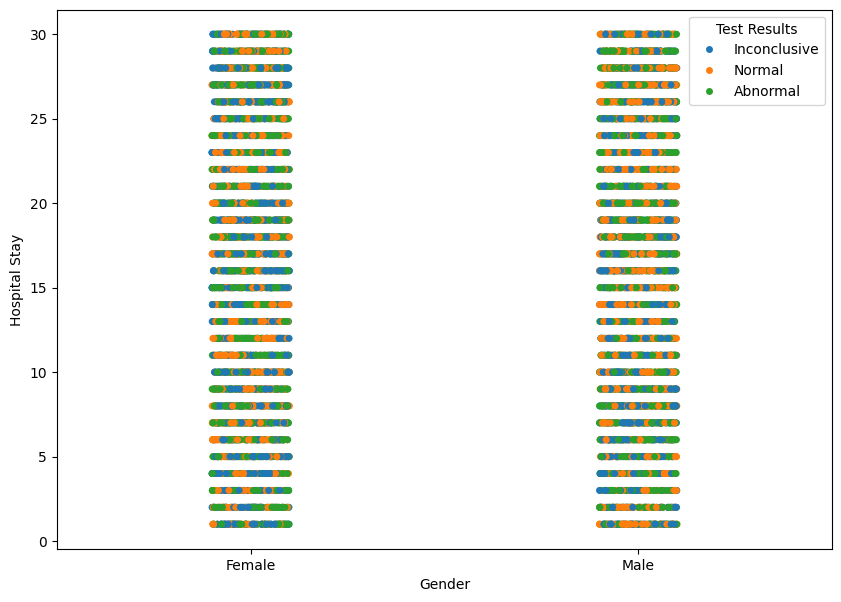

In [373]:
fig,ax=plt.subplots()
sns.stripplot(data=df,x="Gender",hue="Test Results",y="Hospital Stay",ax=ax) 
fig.set_size_inches((10, 7))

**Handling of Billing Amount column**

In [374]:
df_new=df.copy()

In [375]:
df_new.head(10)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Hospital Stay
Name,,,,,,,,,,,,,,,
Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14
Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14
Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30
Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1
Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24
Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal,3
Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal,24
Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal,17
Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal,5


In [376]:
scaler=StandardScaler()

scalled_Billing_Amout=np.array(df_new["Billing Amount"])

scalled_Billing_Amout=scalled_Billing_Amout.reshape(-1,1)

scalled_Billing_Amout=scaler.fit_transform(scalled_Billing_Amout)
df_new["scalled_Billing_Amout"]=scalled_Billing_Amout.reshape(10000,)


In [377]:
df_new.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Hospital Stay,scalled_Billing_Amout
Name,,,,,,,,,,,,,,,,
Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14,0.851249
Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14,1.548866
Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30,0.807452
Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1,-0.157358
Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24,-0.528235


In [378]:
df_new.drop(["Billing Amount","Room Number","Date of Admission","Discharge Date"],inplace=True,axis=1) #Drop columns that do not affect the output

In [379]:
df_new.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results,Hospital Stay,scalled_Billing_Amout
Name,,,,,,,,,,,,
Tiffany Ramirez,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,Elective,Aspirin,Inconclusive,14,0.851249
Ruben Burns,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,Emergency,Lipitor,Normal,14,1.548866
Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,Emergency,Lipitor,Normal,30,0.807452
Antonio Frederick,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,Urgent,Penicillin,Abnormal,1,-0.157358
Mrs. Brandy Flowers,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,Urgent,Paracetamol,Normal,24,-0.528235


In [380]:
df_new.duplicated().sum() # check of duplicated data 

0

In [381]:
df_new.replace({"Female":1 ,"Male":0},inplace=True) # Converting categorical data to numerical data


In [382]:
categrical_list=["Blood Type","Medical Condition","Medication","Insurance Provider","Admission Type"]
#for name in categrical_list:
    
df_new=pd.get_dummies(df_new,columns=categrical_list,dtype='int32')

In [383]:
df_new.head()

,Age,Gender,Doctor,Hospital,Test Results,Hospital Stay,scalled_Billing_Amout,Blood Type_A+,Blood Type_A-,Blood Type_AB+,...,Medication_Paracetamol,Medication_Penicillin,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent
Name,,,,,,,,,,,,,,,,,,,,,
Tiffany Ramirez,81,1,Patrick Parker,Wallace-Hamilton,Inconclusive,14,0.851249,0,0,0,...,0,0,0,0,0,1,0,1,0,0
Ruben Burns,35,0,Diane Jackson,"Burke, Griffin and Cooper",Normal,14,1.548866,0,0,0,...,0,0,0,0,0,0,1,0,1,0
Chad Byrd,61,0,Paul Baker,Walton LLC,Normal,30,0.807452,0,0,0,...,0,0,0,0,0,1,0,0,1,0
Antonio Frederick,49,0,Brian Chandler,Garcia Ltd,Abnormal,1,-0.157358,0,0,0,...,0,1,0,0,0,1,0,0,0,1
Mrs. Brandy Flowers,51,0,Dustin Griffin,"Jones, Brown and Murray",Normal,24,-0.528235,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [384]:
df_new.replace({"Inconclusive":2,"Abnormal":1 ,"Normal":0},inplace=True) # transformation of the target 

In [385]:
#df_new.drop(["Doctor","Hospital"],inplace=True,axis=1)

In [386]:
df_new_doctor=df_new['Doctor'].value_counts().to_dict()
df_new.Doctor=df_new.Doctor.map(df_new_doctor)
df_new_Hospital=df_new['Hospital'].value_counts().to_dict()
df_new.Hospital=df_new.Hospital.map(df_new_Hospital)

In [387]:
df_new.head()

,Age,Gender,Doctor,Hospital,Test Results,Hospital Stay,scalled_Billing_Amout,Blood Type_A+,Blood Type_A-,Blood Type_AB+,...,Medication_Paracetamol,Medication_Penicillin,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent
Name,,,,,,,,,,,,,,,,,,,,,
Tiffany Ramirez,81,1,1,1,2,14,0.851249,0,0,0,...,0,0,0,0,0,1,0,1,0,0
Ruben Burns,35,0,1,1,0,14,1.548866,0,0,0,...,0,0,0,0,0,0,1,0,1,0
Chad Byrd,61,0,1,1,0,30,0.807452,0,0,0,...,0,0,0,0,0,1,0,0,1,0
Antonio Frederick,49,0,1,3,1,1,-0.157358,0,0,0,...,0,1,0,0,0,1,0,0,0,1
Mrs. Brandy Flowers,51,0,1,1,0,24,-0.528235,0,0,0,...,1,0,0,0,0,0,1,0,0,1


# Step 6:- Model Building 

In [388]:
x=df_new.drop('Test Results',axis=1)
y=df_new['Test Results']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [389]:

model=RandomForestClassifier(n_estimators=90)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=90)

In [390]:
y_predict=model.predict(x_test)

In [391]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.35      0.34      0.35       994
           1       0.35      0.40      0.37      1022
           2       0.32      0.29      0.30       984

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000



In [392]:
k =3 # Numero de vizinhos
knn = KNeighborsClassifier(n_neighbors = k)

# Treinar o modelo
knn.fit(x_train, y_train)

# Fazer previsões
ypred = knn.predict(x_test)

In [393]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.34      0.50      0.40       994
           1       0.33      0.26      0.29      1022
           2       0.33      0.25      0.29       984

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.33      3000
weighted avg       0.34      0.34      0.33      3000



In [394]:
LR=LogisticRegression()

In [395]:
LR.fit(x_train,y_train)

LogisticRegression()

In [396]:
y_p=LR.predict(x_test)

In [397]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.35      0.27      0.30       994
           1       0.34      0.48      0.39      1022
           2       0.30      0.24      0.27       984

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.32      3000
weighted avg       0.33      0.33      0.32      3000



# DecisionTree Model

In [398]:
dc_model=DecisionTreeClassifier()
dc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [399]:
y_pred_dc=dc_model.predict(x_test)

In [400]:
print(classification_report(y_test,y_pred_dc))

              precision    recall  f1-score   support

           0       0.34      0.35      0.34       994
           1       0.36      0.35      0.35      1022
           2       0.31      0.31      0.31       984

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000

